In [39]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import ensemble #ансамбли

plt.style.use('seaborn') #стиль отрисовки seaborn
%matplotlib inline

In [40]:
df = pd.read_csv('../Data/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [41]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [42]:
dummy_df = pd.get_dummies(df)
dummy_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


Sessions without purchase: 84.53%
Sessions without purchase: 15.47%


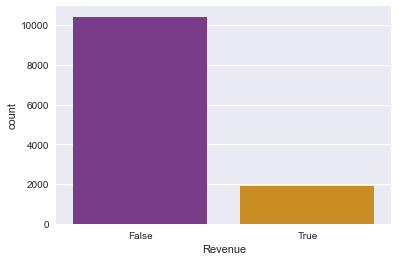

In [43]:
sns.countplot(x='Revenue', data=dummy_df, palette='CMRmap')
class_percent = dummy_df['Revenue'].value_counts(normalize=True)*100
print('Sessions without purchase: {:.2f}%'.format(class_percent[0]))
print('Sessions without purchase: {:.2f}%'.format(class_percent[1]))

In [44]:
X, y = dummy_df.drop('Revenue', axis=1), dummy_df['Revenue']

In [45]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X,y,test_size=0.2,random_state=1, stratify=y)


In [46]:
print(X_train.shape[0], X_valid.shape[0])

9864 2466


In [47]:
model = ensemble.RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

skf = model_selection.StratifiedKFold(n_splits=5)

cv_metrics = model_selection.cross_validate(
    model, X_train, y_train, cv=skf, scoring='f1', return_train_score=True
)

print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 1.00
Valid k-fold mean f1: 0.63


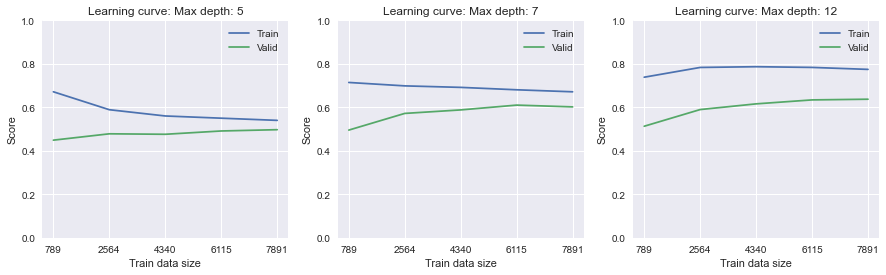

In [48]:
def plot_learning_curve(model, X, y, cv, scoring='f1', ax=None, title=''):
    #Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator = model, #модель
        X = X, #матрица наблюдений X
        y = y, #вектор ответов y
        cv = cv, #кросс-валидатор
        scoring = 'f1' #метрика
    )
    #Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    #Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
    #Строим кривую обучения на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label='Train')
    #Строим кривую обучения на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label='Valid')
    #Даём название графику и подписи осям
    ax.set_title('Learning curve: {}'.format(title))
    ax.set_xlabel('Train data size')
    ax.set_ylabel('Score')
    #Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    #Устаналиваем диапазон оси ординат
    ax.set_ylim(0, 1)
    #Отображаем легенду
    ax.legend();
#Список из глубин деревьев
depths = [5, 7, 12]
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Визуализируем кривые обучения
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) #фигура + три координатных плоскости
#Создаём цикл по списку глубин и индексам этого списка
for i, depth in enumerate(depths): #i-текущий индекс, depth — текущая глубина
    #Создаём модель
    model = ensemble.RandomForestClassifier(
        n_estimators=200,
        max_depth=depth,
        min_samples_leaf=5,
        random_state=42
    )
    #Строим кривую обучению
    plot_learning_curve(model, X_train, y_train, skf, ax=axes[i], title=f'Max depth: {depth}')

In [49]:
model = ensemble.RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)
model.fit(X_train, y_train)
y_test_predict = model.predict(X_valid)
print(metrics.classification_report(y_valid,y_test_predict))

              precision    recall  f1-score   support

       False       0.91      0.98      0.95      2084
        True       0.82      0.50      0.62       382

    accuracy                           0.91      2466
   macro avg       0.87      0.74      0.78      2466
weighted avg       0.90      0.91      0.90      2466



Best threshold = 0.33, F1-Score = 0.68


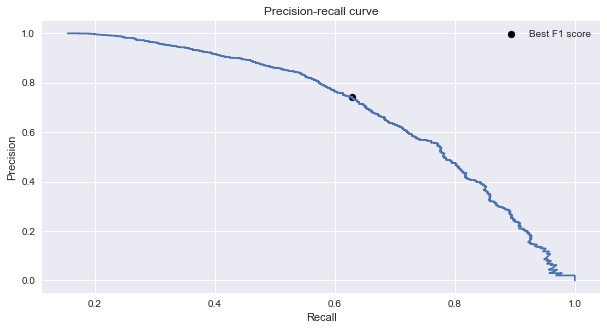

In [51]:
#Создаём модель
model = ensemble.RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)
#Обучаем модель
model.fit(X_train, y_train)
#Создаём кросс-валидатор k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Делаем предсказание вероятностей на кросс-валидации
y_cv_proba_pred = model_selection.cross_val_predict(model, X_train, y_train, cv=skf, method='predict_proba')
#Выделяем столбец с вероятностями для класса 1
y_cv_proba_pred = y_cv_proba_pred[:, 1]

#Вычисляем координаты PR-кривой
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)
#Вычисляем F1-score при различных threshold
f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума F1
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим линейный график зависимости precision от recall
ax.plot(precision, recall)
#Отмечаем точку максимума F1
ax.scatter(precision[idx], recall[idx], marker='o', color='black', label='Best F1 score')
#Даём название графику и подписи осям
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

In [52]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.36
#Объекты, для которых вероятность быть классом 1 > threshold_opt, относим к классу 1
#В противном случае — к классу 0
y_test_pred_proba = model.predict_proba(X_valid)[:, 1]
y_test_pred = (y_test_pred_proba > threshold_opt).astype('int')
#Считаем метрики
print(metrics.classification_report(y_valid, y_test_pred))

              precision    recall  f1-score   support

       False       0.95      0.94      0.94      2084
        True       0.68      0.72      0.70       382

    accuracy                           0.90      2466
   macro avg       0.82      0.83      0.82      2466
weighted avg       0.91      0.90      0.91      2466

